# Logistic Regression In Class Assignment

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below prior to attending lecture on 10/11/22.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


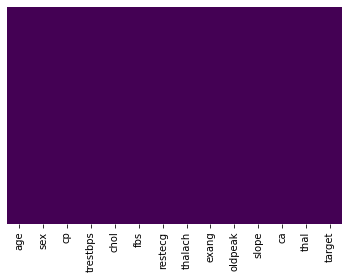

In [ ]:
# CODE HERE
df.info()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# CODE HERE
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


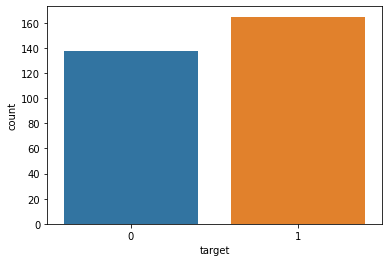

In [22]:
# CODE HERE
# Draw a nested barplot by species and sex


sns.countplot(df['target'])


**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [ ]:
# CODE HERE


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

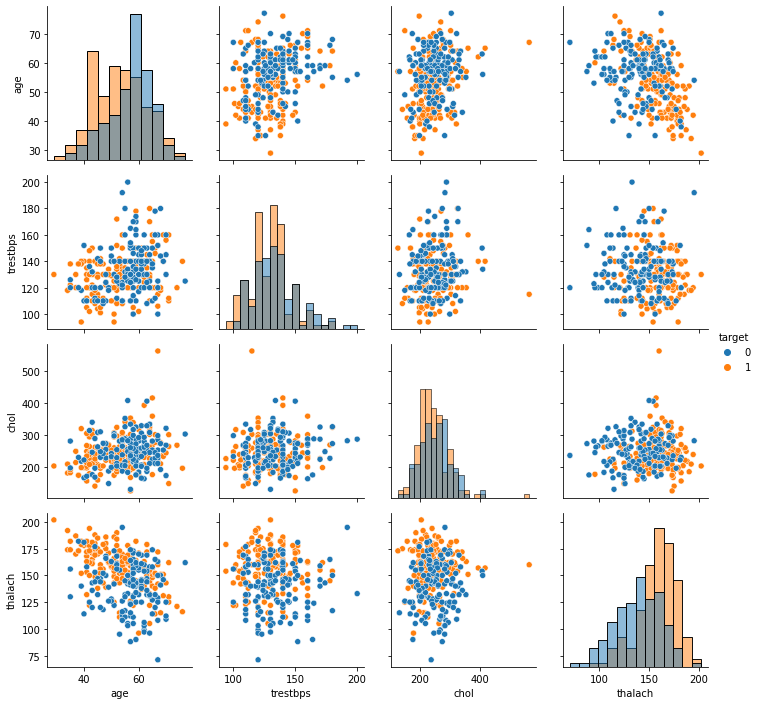

In [ ]:
# CODE HERE
# Running pairplot on everything will take a very long time to render!
g = sns.PairGrid(data=df, vars=['age','trestbps', 'chol','thalach'],hue='target')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**TASK: Create a heatmap that displays the correlation between all the columns.**

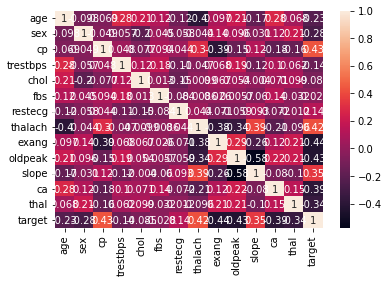

In [ ]:
# CODE HERE
sns.heatmap(df.corr(), annot=True);

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [26]:
# CODE HERE
X = df.drop('target', axis =1)
y= df['target']


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=101)
#Standardization vs Normalization
#   - Normalization (min max scaler) -> (X - Xmin) / (Xmax - Xmin)
#sklearn.preprorocessing import MinMaxScaler
#scaling = MinMaxScaler()
#scaling.fit_transform(df[['age', 'height']])
#   - fit -> calculate mean, std, Xmin, Xmax
#   - transform -> (X - Xmin) / (Xmax - Xmin)
#model.fit() -> learning the parameters and their weight

#   - Standardization (Z-score normalization)
#       - standardizing under the normal distribution premises
#       - mean: 0 and std: 1
#       - fit -> calculate mean, std, Xmin, Xmax
#       - transform -> z = (x - mean) / std

#   - Euclidean distance
#       - in mathematics, it is the distance between 2 points in the euclidean space which is the length 
#         of a line segment between the two points:
#             d(p,q) = Sqrt(Sum i=1 to n (qi - pi)^2)
#             where p, and q are two points
scaler = StandardScaler()
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1


**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# CODE HERE
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)

predictions = log_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Create a logistic regression model and use
## cross-validation to find a well performing C value for the hyper_parameter search. We have two options, use LogisticRegressionCV OR use a combination of LogisticRegression and GridSearchCV

In [33]:
# Report back your search's optimal parameter, specifically the C value
log_model.C_


array([0.04641589])

In [34]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
# model's coeefficients 
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [37]:
y_pred = log_model.predict(scaled_X_test)

In [38]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


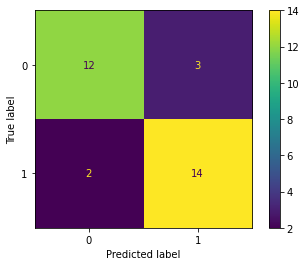

In [39]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [54]:
new_patient = [[54., 1., 3., 122., 286., 0., 0., 200., 1., 3.2, 1., 2., 2.]]

In [55]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [56]:
y_test.iloc[-1]

0

In [57]:
log_model.predict(new_patient)[0]

1